In [1]:
import pandas as pd
from transformers import T5Config, T5ForConditionalGeneration, T5Tokenizer, AutoTokenizer, GenerationConfig, TFT5ForConditionalGeneration
import tensorflow as tf
from typing import Tuple, Dict
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataQuestion = pd.read_csv('/content/drive/MyDrive/scientific-question-answering-dataset/train.csv')
dataQuestion.head()

,question,distractor3,distractor1,distractor2,correct_answer,support
0,What type of organism is commonly used in prep...,viruses,protozoa,gymnosperms,mesophilic organisms,"Mesophiles grow best in moderate temperature, ..."
1,What phenomenon makes global winds blow northe...,tropical effect,muon effect,centrifugal effect,coriolis effect,Without Coriolis Effect the global winds would...
2,Changes from a less-ordered state to a more-or...,endothermic,unbalanced,reactive,exothermic,Summary Changes of state are examples of phase...
3,What is the least dangerous radioactive decay?,zeta decay,beta decay,gamma decay,alpha decay,All radioactive decay is dangerous to living t...
4,Kilauea in hawaii is the world’s most continuo...,magma,greenhouse gases,carbon and smog,smoke and ash,Example 3.5 Calculating Projectile Motion: Hot...


In [4]:
len(dataQuestion)

11679

In [5]:
tokenizer = AutoTokenizer.from_pretrained('t5-small')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [6]:
model = TFT5ForConditionalGeneration.from_pretrained("t5-small")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [7]:
MAX_LENGTH = 512

In [8]:
def preprocess_function_scientific(data):
    input_text = f"Generate question answer: {data.loc['support']}"
    output_text = f"Question: {data.loc['question']}, Answer: {data.loc['correct_answer']}"

    input_encoding = tokenizer(
        input_text, max_length=MAX_LENGTH, padding="max_length", truncation=True, return_tensors="tf"
    )
    output_encoding = tokenizer(
        output_text, max_length=MAX_LENGTH, padding="max_length", truncation=True, return_tensors="tf"
    )

    input_ids = input_encoding["input_ids"]
    attention_mask = input_encoding["attention_mask"]
    labels = output_encoding["input_ids"]

    return {"input_ids": input_ids, "attention_mask": attention_mask, "labels": labels}

In [9]:
train_dataset = np.zeros((5000, 3), dtype=object)
val_dataset = np.zeros((100, 3), dtype=object)
test_dataset = np.zeros((100, 3), dtype=object)

In [10]:
for i in range(5000):
  train_dataset[i] = preprocess_function_scientific(dataQuestion.loc[i])

train_dataset[0]

array([{'input_ids': <tf.Tensor: shape=(1, 512), dtype=int32, numpy=
       array([[ 6939,  2206,   822,  1525,    10, 10162, 21144,    15,     7,
                1604,   200,    16,  8107,  2912,     6,  3115,   344,   944,
                1956,   254,    11,  1283,  1956,   254,    41,  4013,  1956,
                 371,    11,     3, 15442,  1956,   371,   137, 10162, 21144,
                  15,     7,    33,   557,   435,   840,    16,    42,    30,
                   8,  5678,    13,  6917,    42,   119,  3127,     5,    37,
                6624,  1170,  2912,    13,   186,  2071, 20853,   140,     7,
               21144,    15,     7,    19,  6862,  1956,   254,    41,  3916,
                1956,   371,   201,     8,  1389,   936,   643,  2912,     5,
               10162, 21144,   447,  9329,     7,    43,   359,  2284,    16,
                 542,  4537,     6,   379,  3285,     6, 19168,     6,  6061,
                  11,  2013,     5,     1,     0,     0,     0,     0,   

In [11]:
for i in range(100):
  val_dataset[i] = preprocess_function_scientific(dataQuestion.loc[i])

val_dataset[0]

array([{'input_ids': <tf.Tensor: shape=(1, 512), dtype=int32, numpy=
       array([[ 6939,  2206,   822,  1525,    10, 10162, 21144,    15,     7,
                1604,   200,    16,  8107,  2912,     6,  3115,   344,   944,
                1956,   254,    11,  1283,  1956,   254,    41,  4013,  1956,
                 371,    11,     3, 15442,  1956,   371,   137, 10162, 21144,
                  15,     7,    33,   557,   435,   840,    16,    42,    30,
                   8,  5678,    13,  6917,    42,   119,  3127,     5,    37,
                6624,  1170,  2912,    13,   186,  2071, 20853,   140,     7,
               21144,    15,     7,    19,  6862,  1956,   254,    41,  3916,
                1956,   371,   201,     8,  1389,   936,   643,  2912,     5,
               10162, 21144,   447,  9329,     7,    43,   359,  2284,    16,
                 542,  4537,     6,   379,  3285,     6, 19168,     6,  6061,
                  11,  2013,     5,     1,     0,     0,     0,     0,   

In [12]:
for i in range(100):
  test_dataset[i] = preprocess_function_scientific(dataQuestion.loc[i])

test_dataset[0]

array([{'input_ids': <tf.Tensor: shape=(1, 512), dtype=int32, numpy=
       array([[ 6939,  2206,   822,  1525,    10, 10162, 21144,    15,     7,
                1604,   200,    16,  8107,  2912,     6,  3115,   344,   944,
                1956,   254,    11,  1283,  1956,   254,    41,  4013,  1956,
                 371,    11,     3, 15442,  1956,   371,   137, 10162, 21144,
                  15,     7,    33,   557,   435,   840,    16,    42,    30,
                   8,  5678,    13,  6917,    42,   119,  3127,     5,    37,
                6624,  1170,  2912,    13,   186,  2071, 20853,   140,     7,
               21144,    15,     7,    19,  6862,  1956,   254,    41,  3916,
                1956,   371,   201,     8,  1389,   936,   643,  2912,     5,
               10162, 21144,   447,  9329,     7,    43,   359,  2284,    16,
                 542,  4537,     6,   379,  3285,     6, 19168,     6,  6061,
                  11,  2013,     5,     1,     0,     0,     0,     0,   

In [13]:
BATCH_SIZE = 8

In [14]:
train_dict =  {
  "input_ids": np.array([item["input_ids"] for sublist in train_dataset for item in sublist]),
  "attention_mask": np.array([item["attention_mask"] for sublist in train_dataset for item in sublist]),
  "labels": np.array([item["labels"] for sublist in train_dataset for item in sublist]),
}

val_dict =  {
  "input_ids": np.array([item["input_ids"] for sublist in val_dataset for item in sublist]),
  "attention_mask": np.array([item["attention_mask"] for sublist in val_dataset for item in sublist]),
  "labels": np.array([item["labels"] for sublist in val_dataset for item in sublist]),
}

In [15]:
train_dict['input_ids'] = tf.squeeze(train_dict['input_ids'], axis=1)
train_dict['attention_mask'] = tf.squeeze(train_dict['attention_mask'], axis=1)
train_dict['labels'] = tf.squeeze(train_dict['labels'], axis=1)
val_dict['input_ids'] = tf.squeeze(val_dict['input_ids'], axis=1)
val_dict['attention_mask'] = tf.squeeze(val_dict['attention_mask'], axis=1)
val_dict['labels'] = tf.squeeze(val_dict['labels'], axis=1)

In [16]:
train_loader = tf.data.Dataset.from_tensor_slices(train_dict)
train_loader = (train_loader
                .batch(BATCH_SIZE)
                .shuffle(buffer_size=len(train_dataset))
                .prefetch(tf.data.AUTOTUNE)
                )

In [17]:
val_loader = tf.data.Dataset.from_tensor_slices(val_dict)
val_loader = (val_loader
                .batch(BATCH_SIZE)
                .shuffle(buffer_size=len(val_dataset))
                .prefetch(tf.data.AUTOTUNE)
                )

In [18]:
model.compile(optimizer='adamW', metrics=['accuracy'])

In [19]:
model.summary()

Model: "tft5_for_conditional_generation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  16449536  
                                                                 
 encoder (TFT5MainLayer)     multiple                  35330816  
                                                                 
 decoder (TFT5MainLayer)     multiple                  41625344  
                                                                 
Total params: 60506624 (230.81 MB)
Trainable params: 60506624 (230.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
class StopOnAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy=0.90):
        super(StopOnAccuracy, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        val_accuracy = logs.get("val_accuracy")

        if val_accuracy is not None:
            print(f"Epoch {epoch + 1}: Validation Accuracy = {val_accuracy:.2f}")

            if val_accuracy >= self.target_accuracy:
                print(f"Target accuracy of {self.target_accuracy * 100:.2f}% reached. Stopping training.")
                self.model.stop_training = True

In [21]:
history = model.fit(
    train_loader,
    validation_data=val_loader,
    epochs=3,
    verbose=1
)

Epoch 1/3
1875/1875 [==============================] - 1579s 823ms/step - loss: 0.0808 - accuracy: 0.9859 - val_loss: 0.0404 - val_accuracy: 0.9909
Epoch 2/3
1875/1875 [==============================] - 1535s 819ms/step - loss: 0.0519 - accuracy: 0.9894 - val_loss: 0.0297 - val_accuracy: 0.9929
Epoch 3/3
1875/1875 [==============================] - 1545s 824ms/step - loss: 0.0427 - accuracy: 0.9907 - val_loss: 0.0204 - val_accuracy: 0.9949


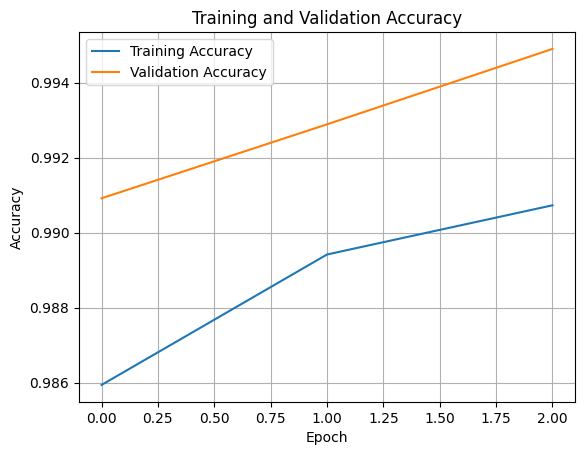

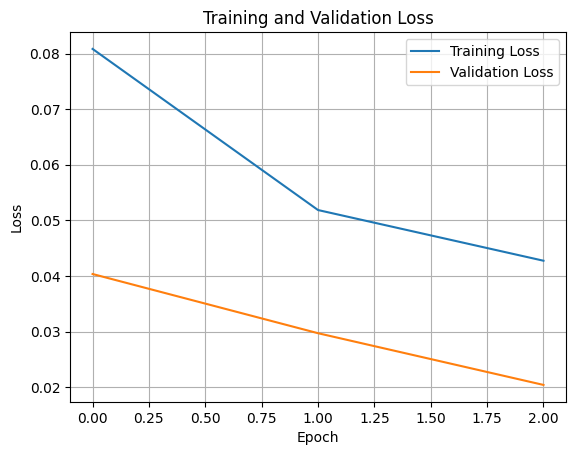

In [22]:
import matplotlib.pyplot as plt

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()


In [23]:
model.save_pretrained('/content/drive/MyDrive/question-answer-v1')

In [24]:
tokenizer.save_pretrained('/content/drive/MyDrive/question-answer-v1')

('/content/drive/MyDrive/question-answer-v1/tokenizer_config.json',
 '/content/drive/MyDrive/question-answer-v1/special_tokens_map.json',
 '/content/drive/MyDrive/question-answer-v1/spiece.model',
 '/content/drive/MyDrive/question-answer-v1/added_tokens.json',
 '/content/drive/MyDrive/question-answer-v1/tokenizer.json')